In [1]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 424.3 kB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import osmnx as ox
import random
import pandas as pd


In [ ]:
from deap import base
from deap import creator
from deap import tools

In [20]:
dots = pd.read_csv("moscow_lat_lon.csv")
dots['dt_in'] = 3600*np.ones(dots.shape[0])
dots

,Unnamed: 0,element_type,osmid,amenity,building,denomination,name,name:uk,natural,religion,...,full_name,official_name:en,place_of_worship:type,note:cadastre:id,year_of_construction,city,object,lat,lon,dt_in
0,0,node,766464835,place_of_worship,church,russian_orthodox,Часовня Макария Желтоводского,Каплиця Макарія Жовтоводського,spring,christian,...,NaN,NaN,NaN,NaN,NaN,Москва,building,55.906487,37.597447,3600.0
1,1,node,2933250101,place_of_worship,church,russian_orthodox,Церковь Иконы Божией Матери Отрада или Утешени...,NaN,NaN,christian,...,NaN,NaN,NaN,NaN,NaN,Москва,building,55.653496,37.596644,3600.0
2,4,way,26233885,place_of_worship,church,orthodox,Храм Покрова Пресвятой Богородицы,NaN,NaN,christian,...,NaN,NaN,NaN,NaN,NaN,Москва,building,55.865253,37.638074,3600.0
3,5,way,27761504,place_of_worship,church,russian_orthodox,Храм Иконы Божией Матери Утоли Моя Печали,NaN,NaN,christian,...,NaN,NaN,NaN,NaN,NaN,Москва,building,55.648280,37.747505,3600.0
4,6,way,27792896,place_of_worship,church,russian_orthodox,Церковь Рождества Христова,NaN,NaN,christian,...,NaN,NaN,NaN,NaN,NaN,Москва,building,55.860695,37.367642,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,256,relation,9341259,theatre,yes,NaN,Театр на Бронной,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Москва,amenity,55.759587,37.598027,3600.0
4135,257,relation,12314802,theatre,yes,NaN,Золотое кольцо,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Москва,amenity,55.811023,37.566728,3600.0
4136,258,relation,13268537,theatre,yes,NaN,Зелёный театр,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Москва,amenity,55.831503,37.617507,3600.0
4137,259,relation,14085861,theatre,yes,NaN,Московский театр иллюзий,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Москва,amenity,55.743657,37.774302,3600.0


In [2]:
place = "Moscow,Russia"
G = ox.graph_from_place(place, network_type="drive")
ox.save_graph_xml(G, filepath='Moscow.osm')

In [19]:
ox.save_graph_xml(G, filepath='Moscow.osm')

/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/io.py:366: UserWarning: For the `save_graph_xml` function to behave properly, the graph must have been created with `ox.settings.all_oneway=True`.
  osm_xml._save_graph_xml(


In [21]:
G = ox.graph_from_xml('Moscow.osm')

/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/graph.py:534: UserWarning: The XML file you are loading appears to have been generated by OSMnx: this use case is not supported and may not behave as expected. To save/load graphs to/from disk for later use in OSMnx, use the `io.save_graphml` and `io.load_graphml` functions instead. Refer to the documentation for details.
  response_jsons = [osm_xml._overpass_json_from_file(filepath)]


In [22]:
G = ox.add_edge_speeds(G)

In [12]:
gdf_nodes,gdf_edges = ox.utils_graph.graph_to_gdfs(G)

In [18]:
gdf_nodes.to_file('gdf_nodes.geojson', driver='GeoJSON')
gdf_edges.to_file('gdf_edges.geojson', driver='GeoJSON')


ValueError: Invalid field type <class 'list'>

In [22]:
first_board = np.array([(37.5974471, 55.9064869),#long,lat
 (37.5966443, 55.6534959),
 (37.5600041, 55.8148701),
(37.5631091, 55.7254091)])

In [17]:
gdf_edges.iloc[1]

osmid                                                  8096919
oneway                                                   False
lanes                                                      NaN
ref                                                        NaN
highway                                           unclassified
reversed                                                 False
length                                                  24.324
geometry     LINESTRING (37.7648216 55.8275043, 37.764687 5...
speed_kph                                                 35.4
name                                                       NaN
maxspeed                                                   NaN
bridge                                                     NaN
access                                                     NaN
tunnel                                                     NaN
junction                                                   NaN
area                                                   

In [ ]:
first_board.T

In [23]:
a = ox.distance.nearest_nodes(G, *first_board.T, return_dist=False)

In [25]:
#orig = ox.distance.nearest_nodes(G, *first_board, return_dist=False)
#dest = ox.distance.nearest_nodes(G, *last_board, return_dist=False)
routes = ox.shortest_path(G, a[:-1], a[1:], weight="length")


In [32]:
b = [x for r in route for x in r ]

In [15]:
c = list(set(b))

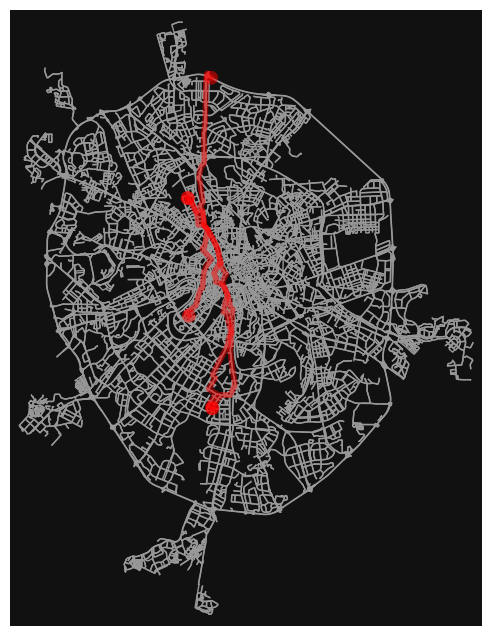

In [28]:
fig, ax = ox.plot_graph_routes(G, routes, route_color="r", route_linewidth=3, node_size=0)

In [20]:
route1_length = int(sum(ox.utils_graph.route_to_gdf(G, route, "length")["length"]))

In [31]:
for i in range(len(route[:-1])):
    print(i)
    route[i] = route[i][:-1]

0
1


In [49]:
len(route[0])

173

In [24]:
route[1][0]

270704856

In [24]:
ox.utils_graph.route_to_gdf(G, route, "length")

,,,osmid,lanes,name,highway,oneway,reversed,length,geometry,junction,maxspeed
u,v,key,,,,,,,,,,
75688385,1122495577,0,96871636,NaN,улица Маршала Жукова,secondary,True,False,122.829,"LINESTRING (38.90564 47.26589, 38.90423 47.26534)",NaN,40
1122495577,1122495193,0,96871636,NaN,улица Маршала Жукова,secondary,True,False,215.469,"LINESTRING (38.90423 47.26534, 38.90176 47.26438)",NaN,40
1122495193,1122495859,0,96871636,NaN,улица Маршала Жукова,secondary,True,False,215.066,"LINESTRING (38.90176 47.26438, 38.89929 47.26341)",NaN,40
1122495859,1122495189,0,96871636,NaN,улица Маршала Жукова,secondary,True,False,214.459,"LINESTRING (38.89929 47.26341, 38.89682 47.26245)",NaN,40
1122495189,1122866213,0,96871636,NaN,улица Маршала Жукова,secondary,True,False,98.735,"LINESTRING (38.89682 47.26245, 38.89569 47.26201)",NaN,40
1122866213,1122866501,0,96900487,NaN,14-й Новый переулок,residential,False,False,74.778,"LINESTRING (38.89569 47.26201, 38.89612 47.26141)",NaN,NaN
1122866501,1122866221,0,96871530,NaN,2-й Линейный проезд,residential,False,False,26.226,"LINESTRING (38.89612 47.26141, 38.89582 47.26129)",NaN,NaN
1122866221,1122865767,0,96900436,NaN,14-й Новый переулок,residential,False,False,55.981,"LINESTRING (38.89582 47.26129, 38.89618 47.26085)",NaN,NaN
1122865767,1122866499,0,96900431,NaN,18-й Квартальный проезд,residential,False,False,90.775,"LINESTRING (38.89618 47.26085, 38.89513 47.26046)",NaN,NaN


In [ ]:
graph_to_gdfs

In [ ]:
graph_from_gdfs

In [16]:
ox.utils_geo.sample_points(G, 3)

/tmp/ipykernel_40300/3204622039.py:1: UserWarning: graph should be undirected to not oversample bidirectional edges
  ox.utils_geo.sample_points(G, 3)
/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)


u           v           key
1122866303  1122495362  0      POINT (38.89730 47.25979)
132083922   1501480879  0      POINT (38.89128 47.23617)
185477156   1127282920  0      POINT (38.86474 47.21579)
dtype: geometry

In [26]:
ox.distance.nearest_nodes(G, 38.89730, 47.25979, return_dist=False)

1122866303

## Функция проверки возможности добавления точки в маршрут
dt_route_to - Время следования из последней точки маршрута в новую точку
dt_route_from - Время следования из новой точки в конечную точку
dt_in - Время нахождения на точке
dt - Свободное время
tau_to,tau_from,tau_in - доп задержки для dt_route_to,dt_route_from,dt_in соответственно

In [23]:
def wey_control(dt_route_to,dt_route_from,dt_in,dt,tau_to=0,tau_from=0,tau_in=0):
    return True if dt >= dt_route_to+dt_in+dt_route_from+tau_to+tau_from+tau_in else False

In [24]:
wey_control(15,5,1,28)

True

## Функция генерации маршрута

In [40]:
dots[['lon','lat']].to_numpy()

array([[37.5974471 , 55.9064869 ],
       [37.5966443 , 55.6534959 ],
       [37.63807393, 55.86525258],
       ...,
       [37.61750718, 55.83150285],
       [37.77430219, 55.74365654],
       [37.63584605, 55.76504192]])

In [25]:
point_pul = dots[['lon','lat']].to_numpy()
pul_id = ox.distance.nearest_nodes(G, *point_pul.T, return_dist=False)
dots['pul_id'] = pul_id

In [42]:
dots

,Unnamed: 0,element_type,osmid,amenity,building,denomination,name,name:uk,natural,religion,...,official_name:en,place_of_worship:type,note:cadastre:id,year_of_construction,city,object,lat,lon,dt_in,pul_id
0,0,node,766464835,place_of_worship,church,russian_orthodox,Часовня Макария Желтоводского,Каплиця Макарія Жовтоводського,spring,christian,...,NaN,NaN,NaN,NaN,Москва,building,55.906487,37.597447,3600.0,994738746
1,1,node,2933250101,place_of_worship,church,russian_orthodox,Церковь Иконы Божией Матери Отрада или Утешени...,NaN,NaN,christian,...,NaN,NaN,NaN,NaN,Москва,building,55.653496,37.596644,3600.0,270704856
2,4,way,26233885,place_of_worship,church,orthodox,Храм Покрова Пресвятой Богородицы,NaN,NaN,christian,...,NaN,NaN,NaN,NaN,Москва,building,55.865253,37.638074,3600.0,66717500
3,5,way,27761504,place_of_worship,church,russian_orthodox,Храм Иконы Божией Матери Утоли Моя Печали,NaN,NaN,christian,...,NaN,NaN,NaN,NaN,Москва,building,55.648280,37.747505,3600.0,249331399
4,6,way,27792896,place_of_worship,church,russian_orthodox,Церковь Рождества Христова,NaN,NaN,christian,...,NaN,NaN,NaN,NaN,Москва,building,55.860695,37.367642,3600.0,4853481680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,256,relation,9341259,theatre,yes,NaN,Театр на Бронной,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Москва,amenity,55.759587,37.598027,3600.0,253232076
4135,257,relation,12314802,theatre,yes,NaN,Золотое кольцо,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Москва,amenity,55.811023,37.566728,3600.0,43190234
4136,258,relation,13268537,theatre,yes,NaN,Зелёный театр,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Москва,amenity,55.831503,37.617507,3600.0,3069239428
4137,259,relation,14085861,theatre,yes,NaN,Московский театр иллюзий,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Москва,amenity,55.743657,37.774302,3600.0,301116938


In [54]:
def route_gen(G,point_pul,start_point,stop_point,bgn_time,end_time,
              n=1,speed=11.,tau_to=0,tau_from=0,tau_in=0,
              max_variant_per_point=3):#m/sec
    free_times = [end_time-bgn_time for i in range(n)]
    start_id = ox.distance.nearest_nodes(G, *start_point, return_dist=False)
    stop_id = ox.distance.nearest_nodes(G, *stop_point, return_dist=False)
    routes_points = [[start_id] for i in range(n)]
    routes_points_times = [[0] for i in range(n)]

    sum_routs_dist = [0 for i in range(n)]
    sum_road_times = [0 for i in range(n)]
    sum_stop_times = [0 for i in range(n)]
    for i in range(n):
        try_counter = 0
        while(free_times[i]>0):
            try:
                point_id = random.choice(point_pul['pul_id'])
                routes = ox.shortest_path(G,[routes_points[i][-1],point_id],
                                         [point_id,stop_id], weight="length")
                s_to = int(sum(ox.utils_graph.route_to_gdf(G, routes[0], "length")["length"]))
                s_from = int(sum(ox.utils_graph.route_to_gdf(G, routes[1], "length")["length"]))
                dt_route_to = s_to/speed
                dt_route_from = int(s_from/speed)
                dt_in = int(point_pul[point_pul['pul_id']==point_id]['dt_in'].values[0])
                if wey_control(dt_route_to,dt_route_from,dt_in,free_times[i],tau_to=tau_to,tau_from=tau_from,tau_in=tau_in):
                    #routes_points[i].append(-1)
                    #routes_points_times[i].append(dt_route_to+tau_to)
                    routes_points[i].append(point_id)
                    #routes_points_times[i].append(dt_in+tau_in)
                    #print(len(routes_points[i]))
                    free_times[i] = free_times[i]-(dt_route_to+dt_in+tau_to+tau_in)
                    #print(free_times[i])
                    sum_routs_dist[i]+=s_to
                    sum_road_times[i]+=dt_route_to+tau_to
                    sum_stop_times[i]+=dt_in+tau_in
                    try_counter = 0

                else:
                    if try_counter > max_variant_per_point:
                        print('errr')
                        routes = ox.shortest_path(G,routes_points[i][-1],
                                         stop_id, weight="length")
                        #routes_points[i].append(-1)
                        
                        routes_points[i].append(stop_id)
                        s = int(sum(ox.utils_graph.route_to_gdf(G, routes, "length")["length"]))
                        dt_route = s/speed
                        #routes_points_times[i].append(dt_route+tau_to)
                        routes_points_times[i].append(0)
                        #print(dt_route)
                        free_times[i] = free_times[i]-(dt_route+tau_to)
                        sum_routs_dist[i]+=s
                        #sum_road_times[i]+=dt_route+tau_to
                        break
                    else:
                        try_counter+=1
            except Exception:
                try_counter+=1
    return routes_points,routes_points_times,free_times,sum_routs_dist,sum_road_times,sum_stop_times,[True for i in range(n)]
                

In [55]:
%%time
routes_points,routes_points_times,free_times,sum_routs_dist,sum_road_times,sum_stop_times,is_ok_arr = route_gen(G,dots,(37.597447,55.906487),(37.747505,55.648280),36000,64800,n=30)

errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
errr
CPU times: user 56.6 s, sys: 19.9 ms, total: 56.6 s
Wall time: 56.7 s


[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0]]

In [32]:
routes_points

[[994738746, 264164391, 625045975, 670434233, 339009111, 255145571, 249331399],
 [994738746,
  8942248230,
  252865392,
  309602558,
  2413717068,
  1427085363,
  249331399],
 [994738746,
  5109935753,
  256026189,
  271872847,
  339942186,
  3127405549,
  1414590544,
  249331399],
 [994738746,
  305052798,
  338774619,
  271856767,
  265978702,
  271855264,
  242157915,
  249331399],
 [994738746, 271854940, 135835258, 6736228361, 51294091, 595607747, 249331399],
 [994738746,
  662297897,
  1461130977,
  10798045146,
  9490875984,
  432443951,
  303281570,
  249331399],
 [994738746, 2439181648, 268182025, 301150731, 338523772, 36158895, 249331399],
 [994738746,
  339829202,
  593815436,
  577558539,
  271854737,
  6378471212,
  249331399],
 [994738746, 2923949083, 271860348, 35884663, 700126316, 87237992, 249331399],
 [994738746,
  112549889,
  251298773,
  8659276678,
  271872847,
  314943660,
  249331399],
 [994738746,
  6950556447,
  432443951,
  2923949083,
  346558009,
  306923942

## Функция расчета характеристик маршрута

In [125]:
def calculate_route_futures(G,route_points,point_pul,bgn_time,end_time,
                            speed = 11.,tau_to=0,tau_from=0,tau_in=0):
    free_times = end_time-bgn_time
    sum_routs_dist = 0
    sum_road_times = 0
    sum_stop_times = 0
    route_points_times = [0]
    
    try:
        routes = ox.shortest_path(G,route_points[:-1],
                                 route_points[1:], weight="length")
        for i,dot in enumerate(route_points[1:-1]):
            print(i,dot)
            s_to = int(sum(ox.utils_graph.route_to_gdf(G, routes[i], "length")["length"]))
            r = ox.shortest_path(G,dot,route_points[-1], weight="length")
            s_from = int(sum(ox.utils_graph.route_to_gdf(G, r, "length")["length"]))
            dt_route_to = s_to/speed
            dt_route_from = int(s_from/speed)
            dt_in = int(point_pul[point_pul['pul_id']==dot]['dt_in'].values[0])
            is_ok = wey_control(dt_route_to,dt_route_from,dt_in,free_times,
                                tau_to=tau_to,tau_from=tau_from,tau_in=tau_in)

            if is_ok:
                #routes_points[i].append(-1)
                #routes_points_times[i].append(dt_route_to+tau_to)
                
                #routes_points_times[i].append(dt_in+tau_in)
                #print(len(routes_points[i]))
                free_times = free_times-(dt_route_to+dt_in+tau_to+tau_in)
                print(i)
                #print(free_times[i])
                sum_routs_dist += s_to
                sum_road_times += dt_route_to+tau_to
                sum_stop_times += dt_in+tau_in

            else:
                break
        s_to = int(sum(ox.utils_graph.route_to_gdf(G, routes[-1], "length")["length"]))
        dt_route_to = s_to/speed
        free_times = free_times-(dt_route_to+tau_to)
        sum_routs_dist += s_to
        sum_road_times += dt_route_to+tau_to

    except ValueError:
        print('err')
        pass
    return route_points,route_points_times,free_times,sum_routs_dist,sum_road_times,sum_stop_times,is_ok

In [126]:
%%time
r_points,r_points_times,free_time,sum_rout_dist,sum_road_time,sum_stop_time,is_ok = calculate_route_futures(G,routes_points[1],dots,36000,64800,
                            speed = 11.,tau_to=0,tau_from=0,tau_in=0)

0 272645866
0
1 634255889
1
2 242157915
2
3 1140741554
3
4 3069239428
4
CPU times: user 975 ms, sys: 7.96 ms, total: 983 ms
Wall time: 982 ms


In [127]:
len(r_points)

7

In [73]:
print(free_time,sum_rout_dist,sum_road_time,sum_stop_time,is_ok)

1657.3636363636383 100569 9142.636363636364 18000 True


In [97]:
p=0
print(free_times[p],sum_routs_dist[p],sum_road_times[p],sum_stop_times[p],is_ok_arr[p])

3684.818181818182 117867 9151.0 14400 True


## Класс объекта 'маршрут'

In [110]:
class WayPoints():
    def __init__(self,route_points,route_points_times,
                 free_time,sum_rout_dist,sum_road_time,
                 sum_stop_time,is_ok):
        self.route_points = route_points 
        self.route_points_times = route_points_times
        self.free_time = free_time
        self.sum_rout_dist = sum_rout_dist
        self.sum_road_time = sum_road_time
        self.sum_stop_time = sum_stop_time
        self.is_ok = is_ok
        self.fitnes = 0
    def new_way(self,route_points):
        self.route_points = route_points 
        self.route_points_times = []
        self.free_time = 0
        self.sum_rout_dist = 0
        self.sum_road_time = 0
        self.sum_stop_time = 0
        self.is_ok = False
        self.fitnes = 0
    def set_param(self,route_points_times,
                 free_time,sum_rout_dist,sum_road_time,
                 sum_stop_time,is_ok):
        self.route_points_times = route_points_times
        self.free_time = free_time
        self.sum_rout_dist = sum_rout_dist
        self.sum_road_time = sum_road_time
        self.sum_stop_time = sum_stop_time
        self.is_ok = is_ok
        self.fitnes = 0

In [128]:
way1 = WayPoints(r_points,r_points_times,
                 free_time,sum_rout_dist,sum_road_time,
                 sum_stop_time,is_ok)

In [129]:
r_points

[994738746, 272645866, 634255889, 242157915, 1140741554, 3069239428, 249331399]

In [130]:
way1.fitnes = 1

In [131]:
way2 = WayPoints(r_points,r_points_times,
                 free_time,sum_rout_dist,sum_road_time,
                 sum_stop_time,is_ok)
way2.fitnes = 2

## Fitnes function

In [121]:
way1.route_points

[[994738746, 5784494736, 7306342432, 31445671, 92151388, 249331399],
 [994738746,
  272645866,
  634255889,
  242157915,
  1140741554,
  3069239428,
  249331399],
 [994738746, 593815436, 303607833, 39480405, 260238354, 7125721569, 249331399],
 [994738746,
  988236108,
  2923949083,
  1684109456,
  312355922,
  595196091,
  3127405549,
  249331399],
 [994738746, 274848223, 472384568, 596545886, 198295539, 239983489, 249331399],
 [994738746,
  60443966,
  87237993,
  1601581127,
  578397354,
  1248186437,
  170442144,
  249331399],
 [994738746,
  100341928,
  239983486,
  43057690,
  5088273989,
  35885285,
  1828458797,
  249331399],
 [994738746,
  593815436,
  665294642,
  569938511,
  1415889367,
  299218799,
  249331399],
 [994738746,
  7866301026,
  253042045,
  338776439,
  1684109456,
  301151355,
  249331399],
 [994738746,
  525264564,
  600485741,
  1211199932,
  269100638,
  238124176,
  249331399],
 [994738746,
  600489924,
  249541476,
  1025140868,
  338464519,
  335859380,


##  Функция Отбора (Селекция)
Турнирный алгоритм

In [132]:
def select(chromosome_list ,k=2):
    new_chromosome_list = []
    for i in range(len(chromosome_list)):
        rivals = random.choices(chromosome_list,k=k)
        new_chromosome_list.append(rivals[0] if rivals[0].fitnes > rivals[1].fitnes else rivals[1])
    return new_chromosome_list

In [133]:
select([way1,way2])[1].fitnes

2

## Функция скрещивания

In [81]:
P_CROSS = 0.9

In [134]:
def cross(way1,way2):
    point_id1 = random.randint(1, len(way1.route_points)-1)
    point_id2 = random.randint(1, len(way1.route_points)-1)
    part_points1_1 = way1.route_points[:point_id1].copy()
    part_points1_2 = way1.route_points[point_id1:].copy()
    part_points2_1 = way2.route_points[:point_id2].copy()
    part_points2_2 = way2.route_points[point_id2:].copy()
    way1.new_way(part_points1_1 + part_points2_2)
    way2.new_way(part_points2_1 + part_points1_2)
    
    

In [135]:
cross(way1,way2)

In [136]:
way1.route_points

[994738746, 3069239428, 249331399]

In [138]:
len(way2.route_points)

11

## Функция мутации


In [181]:
P_MUTE = 0.1

In [179]:
def mute(way,G,point_pul,k=3,p_mute=P_MUTE):
    new_points = ox.utils_geo.sample_points(G, k*len(way.route_points)).to_list()

    for i,point in enumerate(way.route_points[1:-1],start = 1):
        print(i)
        if random.random() <= p_mute:
            print('mutant')
            #lon,lat = point_pul[point_pul['pul_id'] == point][['lon','lat']].values
            print(new_points)
            way.route_points[i] = random.choice(new_points)

In [178]:
%%time
mute(way2,G,dots)

1
mutant


/tmp/ipykernel_32406/3931387525.py:7: UserWarning: graph should be undirected to not oversample bidirectional edges
  new_points = ox.utils_geo.sample_points(G, k).to_list()
/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)
/tmp/ipykernel_32406/3931387525.py:7: UserWarning: graph should be undirected to not oversample bidirectional edges
  new_points = ox.utils_geo.sample_points(G, k).to_list()


[<POINT (37.684 55.792)>, <POINT (37.571 55.664)>, <POINT (37.521 55.779)>]
2
mutant


/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)
/tmp/ipykernel_32406/3931387525.py:7: UserWarning: graph should be undirected to not oversample bidirectional edges
  new_points = ox.utils_geo.sample_points(G, k).to_list()


[<POINT (37.484 55.647)>, <POINT (37.545 55.595)>, <POINT (37.643 55.703)>]
3
mutant


/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)
/tmp/ipykernel_32406/3931387525.py:7: UserWarning: graph should be undirected to not oversample bidirectional edges
  new_points = ox.utils_geo.sample_points(G, k).to_list()


[<POINT (37.604 55.661)>, <POINT (37.84 55.761)>, <POINT (37.54 55.788)>]
4
mutant


/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)
/tmp/ipykernel_32406/3931387525.py:7: UserWarning: graph should be undirected to not oversample bidirectional edges
  new_points = ox.utils_geo.sample_points(G, k).to_list()


[<POINT (37.732 55.768)>, <POINT (37.735 55.768)>, <POINT (37.486 55.792)>]
5
mutant


/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)
/tmp/ipykernel_32406/3931387525.py:7: UserWarning: graph should be undirected to not oversample bidirectional edges
  new_points = ox.utils_geo.sample_points(G, k).to_list()


[<POINT (37.669 55.719)>, <POINT (37.734 55.76)>, <POINT (37.595 55.758)>]
6
mutant


/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)
/tmp/ipykernel_32406/3931387525.py:7: UserWarning: graph should be undirected to not oversample bidirectional edges
  new_points = ox.utils_geo.sample_points(G, k).to_list()


[<POINT (37.481 55.649)>, <POINT (37.625 55.666)>, <POINT (37.74 55.656)>]
7
mutant


/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)
/tmp/ipykernel_32406/3931387525.py:7: UserWarning: graph should be undirected to not oversample bidirectional edges
  new_points = ox.utils_geo.sample_points(G, k).to_list()


[<POINT (37.416 55.66)>, <POINT (37.541 55.744)>, <POINT (37.738 55.622)>]
8
mutant


/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)
/tmp/ipykernel_32406/3931387525.py:7: UserWarning: graph should be undirected to not oversample bidirectional edges
  new_points = ox.utils_geo.sample_points(G, k).to_list()


[<POINT (37.655 55.747)>, <POINT (37.924 55.699)>, <POINT (37.431 55.75)>]
9
mutant
[<POINT (37.572 55.73)>, <POINT (37.747 55.643)>, <POINT (37.794 55.706)>]
CPU times: user 25.6 s, sys: 40 ms, total: 25.7 s
Wall time: 25.8 s


/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)


In [180]:
%%time
mute(way2,G,dots)

/tmp/ipykernel_32406/1454398564.py:2: UserWarning: graph should be undirected to not oversample bidirectional edges
  new_points = ox.utils_geo.sample_points(G, k*len(way.route_points)).to_list()


1
mutant
[<POINT (37.669 55.627)>, <POINT (37.497 55.677)>, <POINT (37.668 55.778)>, <POINT (37.586 55.815)>, <POINT (37.498 55.796)>, <POINT (37.856 55.738)>, <POINT (37.438 55.658)>, <POINT (37.736 55.66)>, <POINT (37.667 55.835)>, <POINT (37.346 55.847)>, <POINT (37.793 55.704)>, <POINT (37.712 55.789)>, <POINT (37.684 55.794)>, <POINT (37.557 55.541)>, <POINT (37.729 55.792)>, <POINT (37.561 55.679)>, <POINT (37.563 55.905)>, <POINT (37.4 55.795)>, <POINT (37.667 55.753)>, <POINT (37.587 55.88)>, <POINT (37.535 55.862)>, <POINT (37.47 55.8)>, <POINT (37.562 55.874)>, <POINT (37.421 55.833)>, <POINT (37.622 55.695)>, <POINT (37.703 55.881)>, <POINT (37.695 55.775)>, <POINT (37.824 55.798)>, <POINT (37.516 55.648)>, <POINT (37.709 55.61)>, <POINT (37.729 55.794)>, <POINT (37.582 55.551)>, <POINT (37.726 55.646)>]
2
mutant
[<POINT (37.669 55.627)>, <POINT (37.497 55.677)>, <POINT (37.668 55.778)>, <POINT (37.586 55.815)>, <POINT (37.498 55.796)>, <POINT (37.856 55.738)>, <POINT (37.43

/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)


In [166]:
d = ox.utils_geo.sample_points(G, 3)

/tmp/ipykernel_32406/2227341500.py:1: UserWarning: graph should be undirected to not oversample bidirectional edges
  d = ox.utils_geo.sample_points(G, 3)
/home/ivan/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)


In [167]:
d.to_list()

[<POINT (37.781 55.812)>, <POINT (37.614 55.641)>, <POINT (37.683 55.856)>]

## Генетический алгоритм

array([[37.5974471 , 55.9064869 ],
       [37.5966443 , 55.6534959 ],
       [37.63807393, 55.86525258],
       ...,
       [37.61750718, 55.83150285],
       [37.77430219, 55.74365654],
       [37.63584605, 55.76504192]])